In [13]:
import pandas as pd

df = pd.read_csv(r'C:\Users\srust\Downloads\data.csv')
print(df.columns.tolist())

['No', 'year', 'month', 'day', 'hour', 'pm2.5', 'DEWP', 'TEMP', 'PRES', 'cbwd', 'Iws', 'Is', 'Ir']


C:\Users\srust\AppData\Roaming\Python\Python313\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
C:\Users\srust\AppData\Roaming\Python\Python313\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
C:\Users\srust\AppData\Roaming\Python\Python313\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/resource_handle.proto. Please 

Dataset size after downsampling: 14608
Train shape: (11648, 48, 11)
Test shape: (2912, 48, 11)


C:\Users\srust\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 48, 64)              │          19,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 32,961 (128.75 KB)

 Trainable params: 32,961 (128.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/80
182/182 ━━━━━━━━━━━━━━━━━━━━ 23s 76ms/step - loss: 0.1159 - val_loss: 0.0841
Epoch 2/80
182/182 ━━━━━━━━━━━━━━━━━━━━ 13s 69ms/step - loss: 0.0646 - val_loss: 0.0495
Epoch 3/80
182/182 ━━━━━━━━━━━━━━━━━━━━ 14s 77ms/step - loss: 0.0399 - val_loss: 0.0323
Epoch 4/80
182/182 ━━━━━━━━━━━━━━━━━━━━ 13s 70ms/step - loss: 0.0277 - val_loss: 0.0234
Epoch 5/80
182/182 ━━━━━━━━━━━━━━━━━━━━ 14s 77ms/step - loss: 0.0208 - val_loss: 0.0184
Epoch 6/80
182/182 ━━━━━━━━━━━━━━━━━━━━ 13s 69ms/step - loss: 0.0167 - val_loss: 0.0150
Epoch 7/80
182/182 ━━━━━━━━━━━━━━━━━━━━ 14s 74ms/step - loss: 0.0139 - val_loss: 0.0135
Epoch 8/80
182/182 ━━━━━━━━━━━━━━━━━━━━ 21s 77ms/step - loss: 0.0119 - val_loss: 0.0111
Epoch 9/80
182/182 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step - loss: 0.0105 - val_loss: 0.0098
Epoch 10/80
182/182 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0095 - val_loss: 0.0088
Epoch 11/80
182/182 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0086 - val_loss: 0.0080
Epoch 12/80
182/182 ━━━━━━━━━━━━

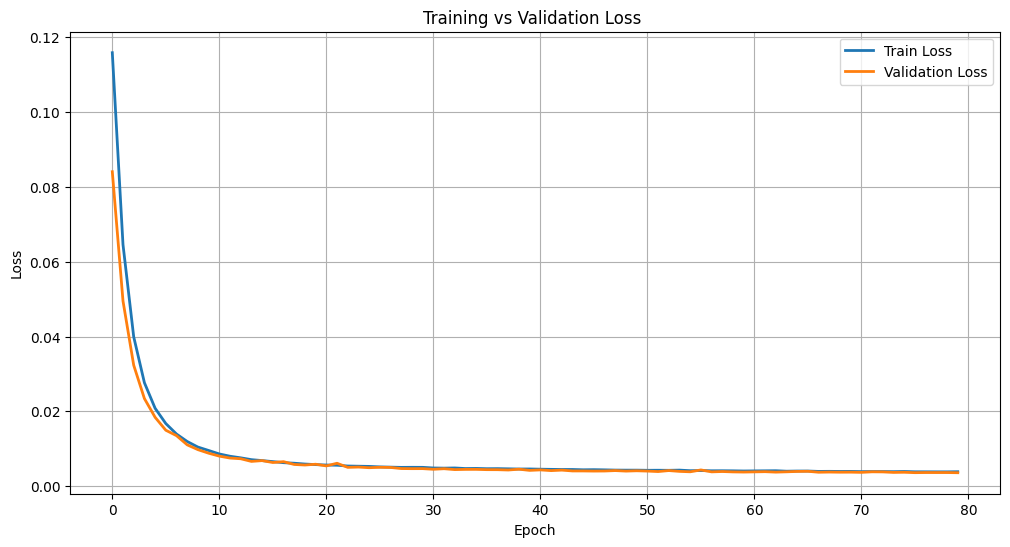

Saved loss curve to: C:\Users\srust\OneDrive\Desktop\OUTPUT LSTM\loss_curve.png


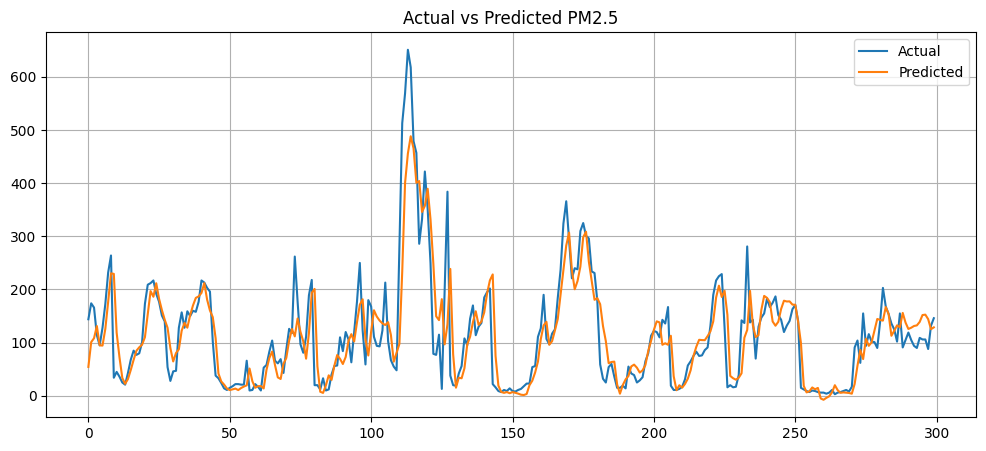

Saved prediction plot to: C:\Users\srust\OneDrive\Desktop\OUTPUT LSTM\actual_vs_predicted.png


In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import tensorflow as tf

from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras import regularizers

df = pd.read_csv(r'C:\Users\srust\Downloads\data.csv')
df = df.rename(columns={"pm2.5": "pm25"})
df = df.ffill().bfill()


df = df.iloc[::3].reset_index(drop=True)
print("Dataset size after downsampling:", len(df))


ohe = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
cbwd_encoded = ohe.fit_transform(df[['cbwd']])
cbwd_cols = [f"cbwd_{c}" for c in ohe.categories_[0]]
df_ohe = pd.DataFrame(cbwd_encoded, columns=cbwd_cols, index=df.index)


features = ["pm25", "DEWP", "TEMP", "PRES", "Iws", "Is", "Ir"]
data_all = pd.concat([df[features], df_ohe], axis=1)


scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data_all.values)


look_back = 48

def create_sequences(data, look_back):
    X, Y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:i+look_back])
        Y.append(data[i+look_back, 0])
    return np.array(X), np.array(Y)

X, y = create_sequences(scaled_data, look_back)


split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


model = Sequential([

    LSTM(64, return_sequences=True,
         kernel_regularizer=regularizers.l2(0.001),
         input_shape=(X_train.shape[1], X_train.shape[2])),  

    LSTM(32, kernel_regularizer=regularizers.l2(0.001)),

    Dense(32, activation='relu',
          kernel_regularizer=regularizers.l2(0.001)),

    Dense(1)
])



model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0003),
    loss='mse'
)

model.summary()


history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=80,
    batch_size=64,   
    verbose=1
)


def invert_pm25(vals):
    dummy = np.zeros((len(vals), scaled_data.shape[1]))
    dummy[:,0] = vals.flatten()
    return scaler.inverse_transform(dummy)[:,0]

y_pred = model.predict(X_test)
y_pred_inv = invert_pm25(y_pred)
y_test_inv = invert_pm25(y_test)

output_dir = r"C:\Users\srust\OneDrive\Desktop\OUTPUT LSTM"
os.makedirs(output_dir, exist_ok=True)


plt.figure(figsize=(12,6))
plt.plot(history.history['loss'], label='Train Loss', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
plt.title("Training vs Validation Loss ")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

plt.savefig(rf"{output_dir}\loss_curve.png", dpi=300, bbox_inches="tight")
plt.show()

print("Saved loss curve to:", rf"{output_dir}\loss_curve.png")


plt.figure(figsize=(12,5))
plt.plot(y_test_inv[:300], label='Actual')
plt.plot(y_pred_inv[:300], label='Predicted')
plt.title("Actual vs Predicted PM2.5")
plt.grid(True)
plt.legend()

plt.savefig(rf"{output_dir}\actual_vs_predicted.png", dpi=300, bbox_inches="tight")
plt.show()

print("Saved prediction plot to:", rf"{output_dir}\actual_vs_predicted.png")


In [2]:
import pandas as pd
import os

output_dir = r"C:\Users\srust\OneDrive\Desktop"
os.makedirs(output_dir, exist_ok=True)


results_df = pd.DataFrame({
    "Actual_PM25": y_test_inv,
    "Predicted_PM25": y_pred_inv
})


csv_path = rf"{output_dir}\pm25_predictions.csv"
results_df.to_csv(csv_path, index=False)

print("Saved prediction CSV to:", csv_path)


Saved prediction CSV to: C:\Users\srust\OneDrive\Desktop\pm25_predictions.csv
